In [18]:
import os
import glob

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import datetime

from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout, UpSampling2D

class Autoencoder():
    def __init__(self):
        self.img_rows = 258
        self.img_cols = 540
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        
        optimizer = Adam(lr=0.001)
        
        self.autoencoder_model = self.build_model()
        self.autoencoder_model.compile(loss='mse', optimizer=optimizer)
        self.autoencoder_model.summary()
    
    def build_model(self):
        input_layer = Input(shape=self.img_shape)
        
        # encoder
        h = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
        h = MaxPooling2D((2, 2), padding='same')(h)
        
        # decoder
        h = Conv2D(64, (3, 3), activation='relu', padding='same')(h)
        h = UpSampling2D((2, 2))(h)
        output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(h)
        return Model(input_layer, output_layer)
    
    def train_model(self, x_train, y_train, x_val, y_val, epochs, batch_size=20):
        early_stopping = EarlyStopping(monitor='val_loss',
                                       min_delta=0,
                                       patience=5,
                                       verbose=1, 
                                       mode='auto')
        log_dir = "/home/anish/FgSegnet_East/scripts/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

        history = self.autoencoder_model.fit(x_train, y_train,
                                             batch_size=batch_size,
                                             epochs=epochs,
                                             validation_data=(x_val, y_val),
                                             callbacks=[early_stopping,tensorboard_callback])
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()
    def eval_model(self, x_test):
        preds = self.autoencoder_model.predict(x_test)
        return preds
 

In [19]:
train_dir = os.path.join('..', 'training_sets', 'SBI2015_train', 'train')
dataset_dir = os.path.join('..', 'datasets', 'SBI2015_dataset', 'train', 'input')

In [20]:

    y_train = glob.glob(os.path.join(train_dir,'*.png'))
    x_train = glob.glob(os.path.join(dataset_dir,'*.png' ))

In [21]:
def load_image(path):
    image_list = np.zeros((len(path), 258, 540, 1))
    for i, fig in enumerate(path):
        img = image.load_img(fig, color_mode='grayscale', target_size=(258, 540))
        x = image.img_to_array(img).astype('float32')
        x = x / 255.0
        image_list[i] = x
    
    return image_list

In [22]:
y_train= load_image(y_train)
x_train=load_image(x_train)

In [23]:
print(x_train.shape, y_train.shape)

(50, 258, 540, 1) (50, 258, 540, 1)


In [24]:
y_train =np.array(y_train)
x_train =np.array(x_train)

In [25]:
%matplotlib inline

In [26]:
def train_val_split(x_train, y_train):
    rnd = np.random.RandomState(seed=42)
    perm = rnd.permutation(len(x_train))
    train_idx = perm[:int(0.8 * len(x_train))]
    val_idx = perm[int(0.8 * len(x_train)):]
    return x_train[train_idx], y_train[train_idx], x_train[val_idx], y_train[val_idx]

x_train, y_train, x_val, y_val = train_val_split(x_train, y_train)
print(x_train.shape, x_val.shape)

(40, 258, 540, 1) (10, 258, 540, 1)


In [29]:
ae = Autoencoder()
ae.train_model(x_train, y_train, x_val, y_val, epochs=4, batch_size=1)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 258, 540, 1)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 258, 540, 64)      640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 129, 270, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 129, 270, 64)      36928     
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 258, 540, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 258, 540, 1)       577       
Total params: 38,145
Trainable params: 38,145
Non-trainable params: 0
_______________________________________________________

AttributeError: 'Model' object has no attribute '_eval_function'

In [28]:
import datetime
import tensorflow as tf
from keras.callbacks import TensorBoard

In [11]:
test= '/home/anish/denoising-dirty-documents/denoising-dirty-documents/test'
x_test = glob.glob(os.path.join(test,'*.png' ))
len(x_test)

3

In [12]:
x_test =load_image(x_test)

In [13]:
len(x_test)

3

In [14]:
preds = ae.eval_model(x_test)

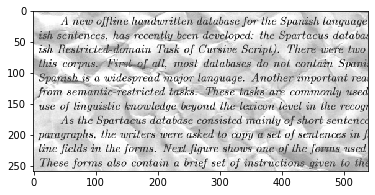

In [16]:
preds_0 = preds[2] * 255.0
preds_0 = preds_0.reshape(258, 540)
x_test_0 = x_test[2] * 255.0
x_test_0 = x_test_0.reshape(258, 540)
plt.imshow(x_test_0, cmap='gray')

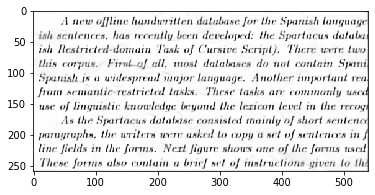

In [17]:
plt.imshow(preds_0, cmap='gray')

In [19]:
"""
Created on monday 1 june 2020

@author: Anish Kumar
"""

#get_ipython().magic(u'load_ext autoreload')
#get_ipython().magic(u'autoreload 2')

import numpy as np
import tensorflow as tf
import random as rn
import os, sys
import datetime
from keras.callbacks import TensorBoard
from keras.preprocessing import image
# set current working directory
cur_dir = os.getcwd()
os.chdir(cur_dir)
sys.path.append(cur_dir)

# =============================================================================
#  For reprodocable results
# =============================================================================
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
rn.seed(12345)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
from keras import backend as K
tf.set_random_seed(1234)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

import keras, glob
import config
from keras.preprocessing import image as kImage
from sklearn.utils import compute_class_weight
from keras.utils.data_utils import get_file

# alert the user
if keras.__version__!= '2.0.6' or tf.__version__!='1.1.0' or sys.version_info[0]<3:
    print('We implemented using [keras v2.0.6, tensorflow-gpu v1.1.0, python v3.6.3], other versions than these may cause errors somehow!\n')

# =============================================================================
# Few frames, load into memory directly
# =============================================================================
def getData(train_dir, dataset_dir, scene):
    
    void_label = -1.
    
    Y_list = glob.glob(os.path.join(train_dir,'*.png'))
    X_list = glob.glob(os.path.join(dataset_dir,'*.png' ))
    if len(Y_list)<=0 or len(X_list)<=0:
        raise ValueError('System cannot find the dataset path or ground-truth path. Please give the correct path.')
        
    # filter matched files        
    X_list_temp = []
    for i in range(len(Y_list)):
        Y_name = os.path.basename(Y_list[i])
        for j in range(len(X_list)):
            X_name = os.path.basename(X_list[j])            
            if (Y_name == X_name):
                X_list_temp.append(X_list[j])
                break
            
    X_list = X_list_temp
    
    if len(X_list)!=len(Y_list):
        raise ValueError('The number of X_list and Y_list must be equal.')
        
    # X must be corresponded to Y
    X_list = sorted(X_list)
    Y_list = sorted(Y_list)
    # process training images
    X = np.zeros((len(X_list), 420, 540, 3))
    Y = np.zeros((len(Y_list), 420, 540, 1))
    for i, fig in enumerate(X_list):
        x = image.load_img(fig , target_size=(420, 540))
        x = image.img_to_array(x).astype('float32')
        x=x/255
        X[i]=x
    for i, fig in enumerate(Y_list):
        x = kImage.load_img(fig , grayscale=True,target_size=(420, 540))
        x = kImage.img_to_array(x).astype('float32')
        x=x/255
        Y[i]=x    
    X = np.asarray(X)
    print(np.size(X))
    Y = np.asarray(Y)
    print(np.size(Y))
    # Shuffle the training data
    idx = list(range(X.shape[0]))
    np.random.shuffle(idx)
    np.random.shuffle(idx)
    X = X[idx]
    Y = Y[idx]
    
    # compute class weights
    cls_weight_list = []
    for i in range(Y.shape[0]):
        y = Y[i].reshape(-1)
        idx = np.where(y!=void_label)[0]
        if(len(idx)>0):
            y = y[idx]
        lb = np.unique(y) #  0., 1
        cls_weight = compute_class_weight('balanced', lb , y)
        class_0 = cls_weight[0]
        class_1 = cls_weight[1] if len(lb)>1 else 1.0
        
        cls_weight_dict = {0:class_0, 1: class_1}
        cls_weight_list.append(cls_weight_dict)
        
    cls_weight_list = np.asarray(cls_weight_list)
    print(np.shape(Y))
    return[X, Y, cls_weight_list]


 
def train(data, scene, mdl_path, vgg_weights_path):
    
    ### hyper-params
    lr = config.lr
    val_split = config.val_split 
    max_epoch = config.max_epoch
    batch_size = config.batch_size
    ###
    
    img_shape = np.shape(data[0][0])#(height, width, channel)
    model = config.model(lr, img_shape, scene, vgg_weights_path)
    model = model.initModel('SBI')

    # make sure that training input shape equals to model output
    input_shape = (img_shape[0], img_shape[1])
    output_shape = (model.output._keras_shape[1], model.output._keras_shape[2])
    assert input_shape==output_shape, 'Given input shape:' + str(input_shape) + ', but your model outputs shape:' + str(output_shape)
    early = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, verbose=0, mode='auto')
    '''
    mc = keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                     save_weights_only=False, period=1)
    '''
    redu = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto')
    log_dir = "/home/anish/FgSegnet_East/scripts/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    model.fit(data[0],data[1], validation_split=val_split, epochs=max_epoch, batch_size=batch_size, 
              callbacks=[redu, early,tensorboard_callback], verbose=1, class_weight=data[2], shuffle = True)
    #model.summary() 
    model.save(mdl_path)
    del model, data, early, redu



# =============================================================================
# Main func
# =============================================================================

dataset = [ 'train' ]


main_dir = os.path.join('..', 'FgSegNet_v2')
vgg_weights_path = config.weights_path
'''
vgg_weights_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
if not os.path.exists(vgg_weights_path):
    WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
    vgg_weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                WEIGHTS_PATH_NO_TOP, cache_subdir='models',
                                file_hash='6d6bbae143d832006294945121d1f1fc')
'''
main_mdl_dir = os.path.join(main_dir, 'SBI', 'models')
if not os.path.exists(main_mdl_dir):
    os.makedirs(main_mdl_dir)
   
for scene in dataset:
    print ('Training ->>> ' + scene)
    
    train_dir = os.path.join('..', 'training_sets', 'SBI2015_train', scene)
    dataset_dir = os.path.join('..', 'datasets', 'SBI2015_dataset', scene, 'input')

    mdl_path = os.path.join(main_mdl_dir, 'mdl_' + scene + '1'+'.h5')

    results = getData(train_dir, dataset_dir, scene)
    train(results, scene, mdl_path, vgg_weights_path)
    del results


We implemented using [keras v2.0.6, tensorflow-gpu v1.1.0, python v3.6.3], other versions than these may cause errors somehow!

Training ->>> train
34020000
11340000
(50, 420, 540, 1)
3
(?, 420, 540, 3) (?, 210, 270, 64) (?, 105, 135, 256)
Train on 40 samples, validate on 10 samples
Epoch 1/10


AttributeError: 'Model' object has no attribute '_eval_function'

In [2]:
%load_ext tensorboard

The tensorboard module is not an IPython extension.


In [3]:
 %load_ext tensorboard.notebook

In [4]:
!rm -rf ./logs/ 

In [4]:
%tensorboard --logdir logs/fit

invalid info file: '/tmp/.tensorboard-info/pid-6329.info'
Traceback (most recent call last):
  File "/home/anish/anaconda3/lib/python3.7/site-packages/tensorboard/manager.py", line 317, in get_all
    info = _info_from_string(contents)
  File "/home/anish/anaconda3/lib/python3.7/site-packages/tensorboard/manager.py", line 158, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXIiLCJsb2dzL2ZpdCJdLCJjb25maWd1cmVfa3dhcmdzIjp7fSwid29ya2luZ19kaXJlY3RvcnkiOiIvaG9tZS9hbmlzaC9GZ1NlZ25ldF9FYXN0L3NjcmlwdHMifQ==', 'db': '', 'logdir': 'logs/fit', 'path_prefix': '', 'pid': 6329, 'port': 6006, 'start_time': 1595566162, 'version': '2.3.0'}
invalid info file: '/tmp/.tensorboard-info/pid-6329.info'
Traceback (most recent call last):
  File "/home/anish/anaconda3/lib/python3.7/site-packages/tensorboard/manager.py", line 317, in get_all
    info = _info_from_string(contents)
  File "/home/ani

In [3]:
import tensorboard 
import os

In [6]:
logs_base_dir ='/home/anish/FgSegnet_East/scripts/logs/20200805-221827'
os.makedirs(logs_base_dir, exist_ok=True)
%load_ext tensorboard.notebook
%tensorboard --logdir {logs_base_dir}


The tensorboard.notebook extension is already loaded. To reload it, use:
  %reload_ext tensorboard.notebook
